In [1]:
#imports
import numpy as np
from matplotlib import pyplot
from Star.Estrela import Estrela
from Planet.Eclipse import Eclipse
from Misc.Verify  import Validar,calSemiEixo,calculaLat
import cv2 as cv
import numpy as np

## Modelando a Estrela

In [2]:
raio= 373. #default (pixel)
intensidadeMaxima=240 #default
tamanhoMatriz = 856 #default
raioSun=0.805 #raio da estrela em relacao ao raio do sol
raioStar=raioSun*696340 #multiplicando pelo raio solar em Km 
coeficienteHum=0.377
coeficienteDois=0.024

#cria estrela
estrela_ = Estrela(raio,raioSun,intensidadeMaxima,coeficienteHum,coeficienteDois,tamanhoMatriz)

Nx= estrela_.getNx() #Nx e Ny necessarios para a plotagem do eclipse
Ny= estrela_.getNy()
dtor = np.pi/180.  

## Modelando o Planeta

In [3]:
periodo = 2.219 # em dias
anguloInclinacao = 85.51  # em graus
ecc = 0
anom = 0 
raioPlanJup = 1.138 # em relação ao raio de jupiter
raioPlanetaRstar = (raioPlanJup*69911)/raioStar # multiplicando pelo raio de jupiter em km 
semiEixoUA = 0.031 # UA
semiEixoRaioStar = ((1.469*(10**8))*semiEixoUA)/raioStar

In [4]:
estrela = estrela_.getEstrela()

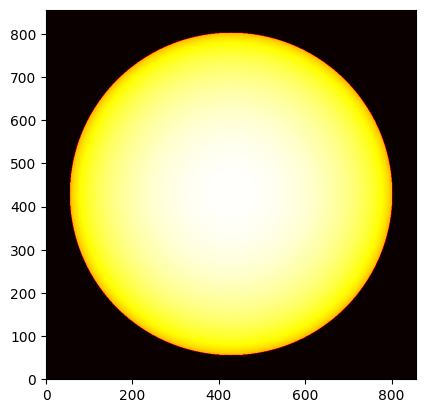


Aguarde um momento, a animacao do trânsito está sendo gerada...



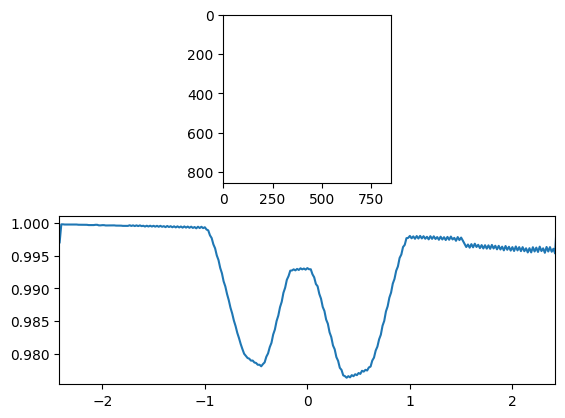

Tempo Total (Trânsito): 4.838149455534431


ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [5]:
#eclipse
lua = False
cme = False 
eclipse= Eclipse(Nx,Ny,raio,estrela)
estrela_.Plotar(tamanhoMatriz,estrela)
eclipse.geraTempoHoras()
tempoHoras=eclipse.getTempoHoras()

eclipse.criarEclipse(semiEixoRaioStar, semiEixoUA, raioPlanetaRstar,raioPlanJup,periodo,anguloInclinacao,lua,ecc,anom)


print ("Tempo Total (Trânsito):",eclipse.getTempoTransito()) 
tempoTransito=eclipse.getTempoTransito()
curvaLuz=eclipse.getCurvaLuz()
tempoHoras=eclipse.getTempoHoras()

#Plotagem da curva de luz 
pyplot.plot(tempoHoras,curvaLuz)
pyplot.axis([-tempoTransito/2,tempoTransito/2,min(curvaLuz)-0.001,1.001])                       
pyplot.show()


## Modelando interferências na curva de Luz

### Adicionando manchas

In [ ]:
latsugerida = calculaLat(semiEixoRaioStar,anguloInclinacao)
print("A latitude sugerida para que a mancha influencie na curva de luz da estrela é:", latsugerida)

#manchas
count = 0
quantidade = 0 #quantidade de manchas desejadas, se quiser acrescentar, mude essa variavel
#cria vetores do tamanho de quantidade para colocar os parametros das manchas
fa = [0.]*quantidade #vetor area manchas
fi = [0.]*quantidade #vetor intensidade manchas
li = [0.]*quantidade #vetor longitude manchas

while count!=quantidade: #o laço ira rodar a quantidade de manchas selecionada pelo usuario
    print('\033[1;35m\n\n══════════════════ Parâmetros da mancha ',count+1,'═══════════════════\n\n\033[m')
    r = Validar('Digite o raio da mancha em função do raio da estrela em pixels:')
                
    intensidadeMancha= float(input('Digite a intensidade da mancha em função da intensidade máxima da estrela:'))
    fi[count]=intensidadeMancha
    lat=float(input('Latitude da mancha:'))
    longt=float(input('Longitude da mancha:'))
    li[count]=longt

    raioMancha= r*raioStar
    area = np.pi *(raioMancha**2)
    fa[count]= area

    estrela=estrela_.manchas(r,intensidadeMancha,lat,longt) #recebe a escolha de se irá receber manchas ou não
    count+=1

estrela_.Plotar(tamanhoMatriz,estrela)

### Adicionando CMEs

In [ ]:
estrela = estrela_.getEstrela()
temperatura_CME = 4000.0
estrela = estrela_.cme(temperatura_CME)

estrela_.Plotar(tamanhoMatriz,estrela)

### Adicionando luas

In [ ]:
#criando lua 
lua = False #se nao quiser luas, mudar para False

#instanciando LUA
rmoon = 0.5 #em relacao ao raio da Terra
rmoon = rmoon *6371 #multiplicando pelo R da terra em Km
mass = 0.001 #em relacao a massa da Terra
mass = mass * (5.972*(10**24))
massPlaneta = 0.002 #em relacao ao R de jupiter
massPlaneta = massPlaneta * (1.898 *(10**27)) #passar para gramas por conta da constante G
G = (6.674184*(10**(-11)))
perLua = 0.1 #em dias 
distancia=((((perLua*24.*3600./2./np.pi)**2)*G*(massPlaneta+mass))**(1./3))/raioStar
distancia = distancia/100
moon = eclipse.criarLua(rmoon,mass,raio,raioStar,tempoHoras,anguloInclinacao,periodo,distancia)
estrela = estrela_.getEstrela()

### Analisando curva de luz

In [ ]:
#eclipse
eclipse= Eclipse(Nx,Ny,raio,estrela)
estrela_.Plotar(tamanhoMatriz,estrela)
eclipse.geraTempoHoras()
tempoHoras=eclipse.getTempoHoras()

eclipse.criarEclipse(semiEixoRaioStar, semiEixoUA, raioPlanetaRstar,raioPlanJup,periodo,anguloInclinacao,lua,ecc,anom)


print ("Tempo Total (Trânsito):",eclipse.getTempoTransito()) 
tempoTransito=eclipse.getTempoTransito()
curvaLuz=eclipse.getCurvaLuz()
tempoHoras=eclipse.getTempoHoras()

#Plotagem da curva de luz 
pyplot.plot(tempoHoras,curvaLuz)
pyplot.axis([-tempoTransito/2,tempoTransito/2,min(curvaLuz)-0.001,1.001])                       
pyplot.show()
